In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train2.csv')
df = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'])
categorical_columns = ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

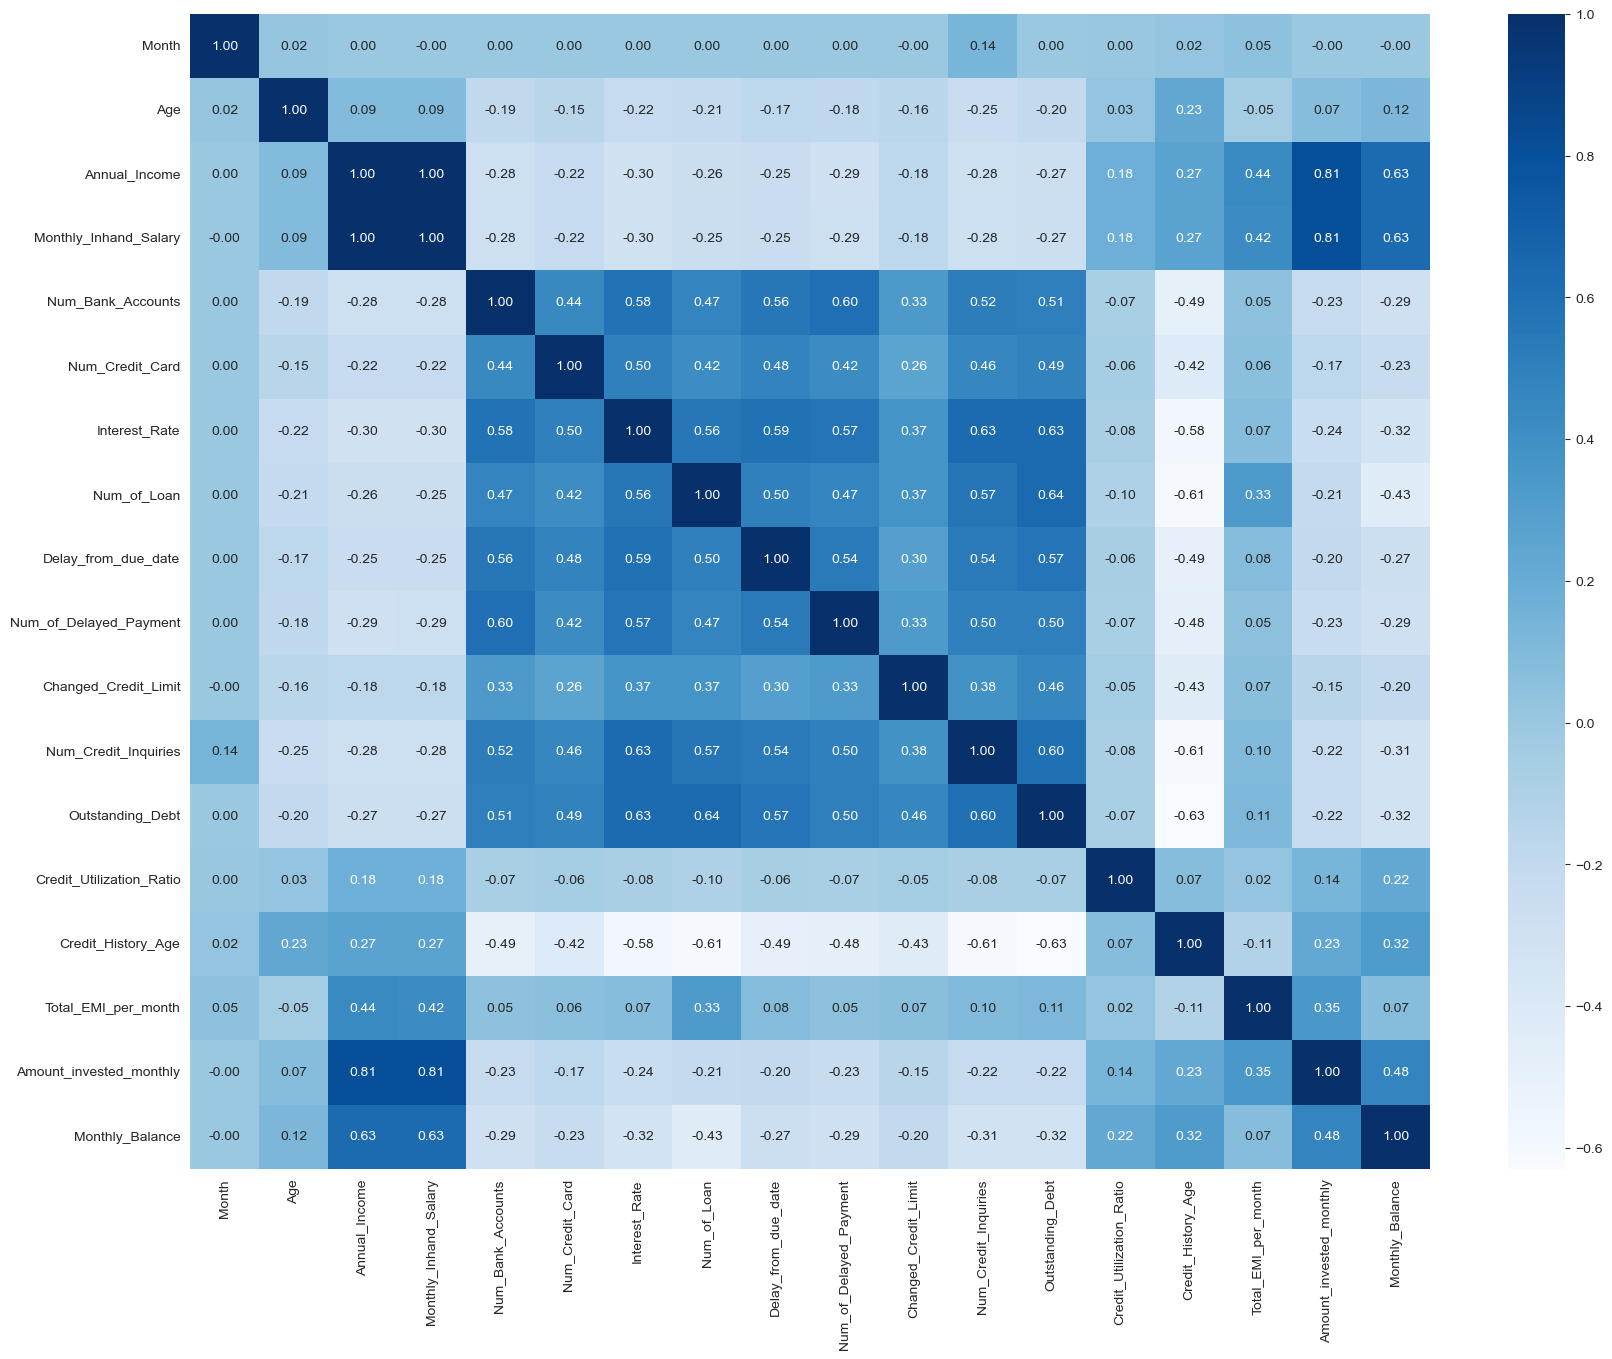

In [26]:
cr = df.drop(columns=['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']).corr()

plt.figure(figsize=(20, 15))
sns.heatmap(cr, annot=True, fmt=".2f", cmap="Blues") 
plt.show()

In [17]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

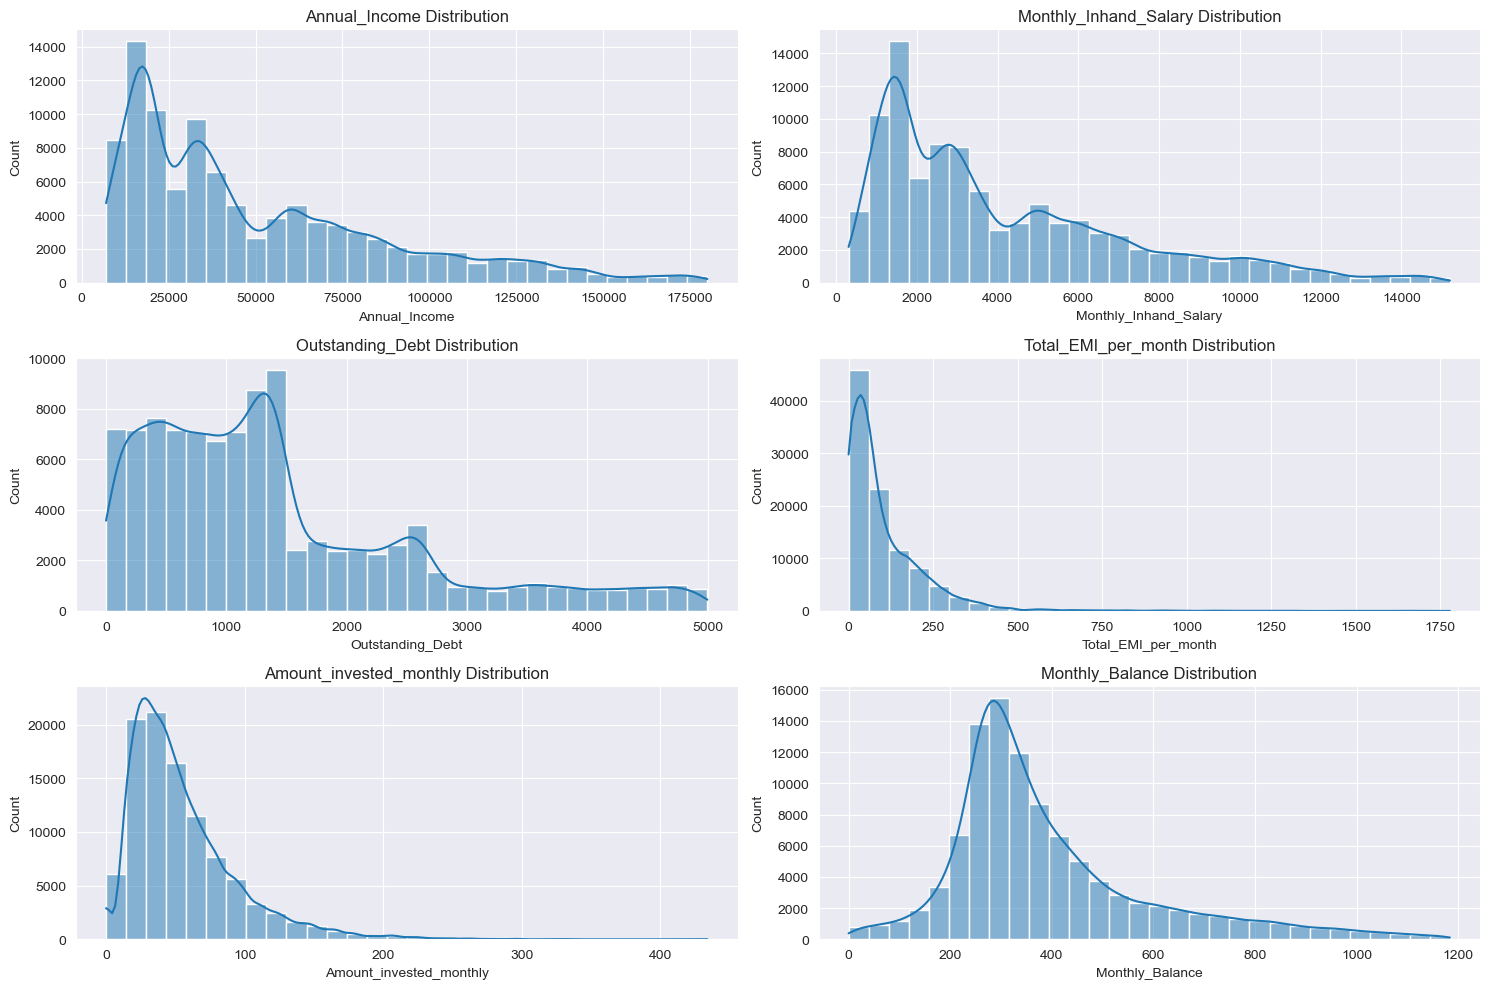

In [22]:
# 돈과 관련된 변수들 (연간 소득, 월급, 미지급 잔액, 총 EMI, 투자 금액 등)
money_related_columns = [
    'Annual_Income', 
    'Monthly_Inhand_Salary', 
    'Outstanding_Debt', 
    'Total_EMI_per_month', 
    'Amount_invested_monthly',
    'Monthly_Balance'
]

# 히스토그램과 KDE 그리기
plt.figure(figsize=(15, 10))
for i, col in enumerate(money_related_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

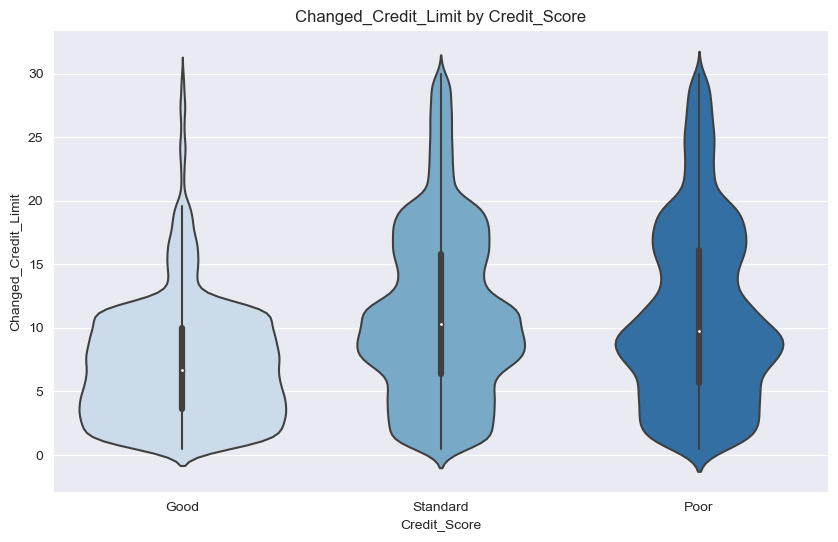

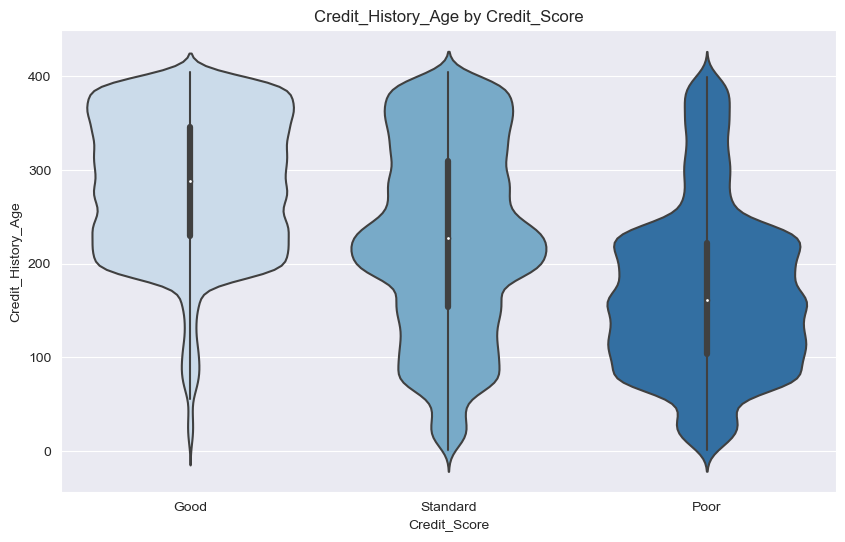

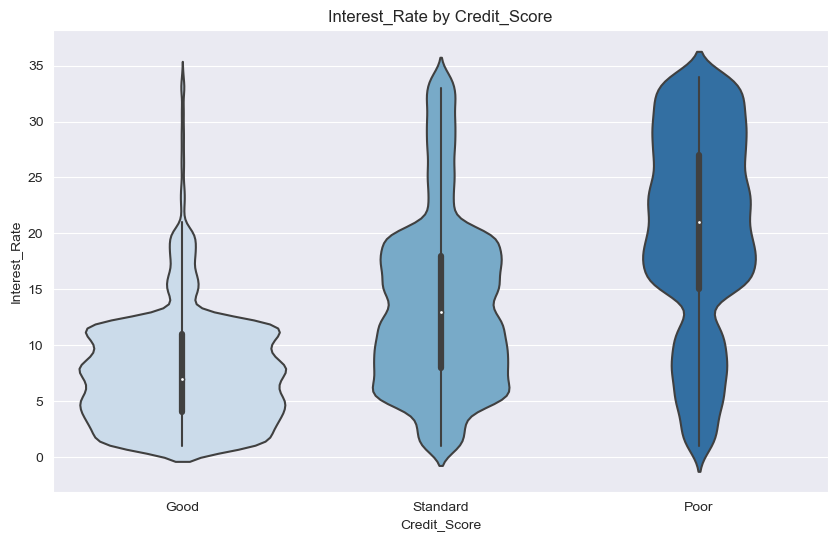

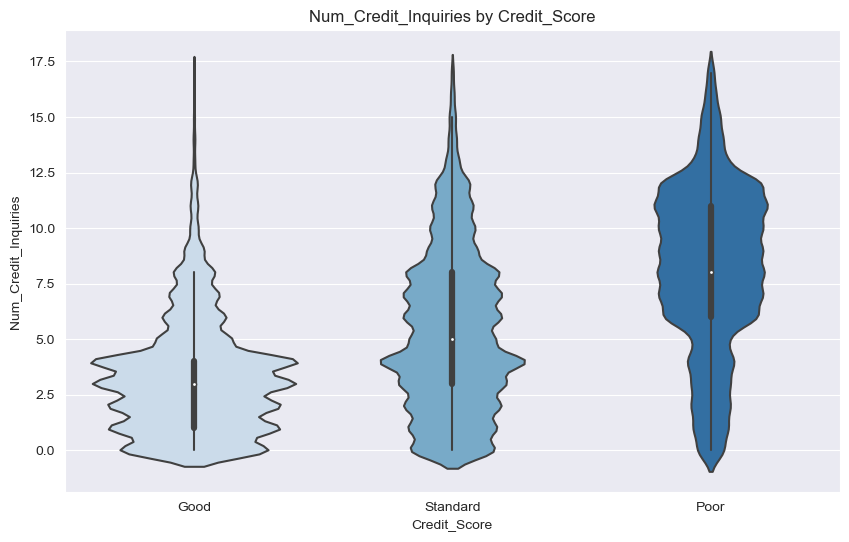

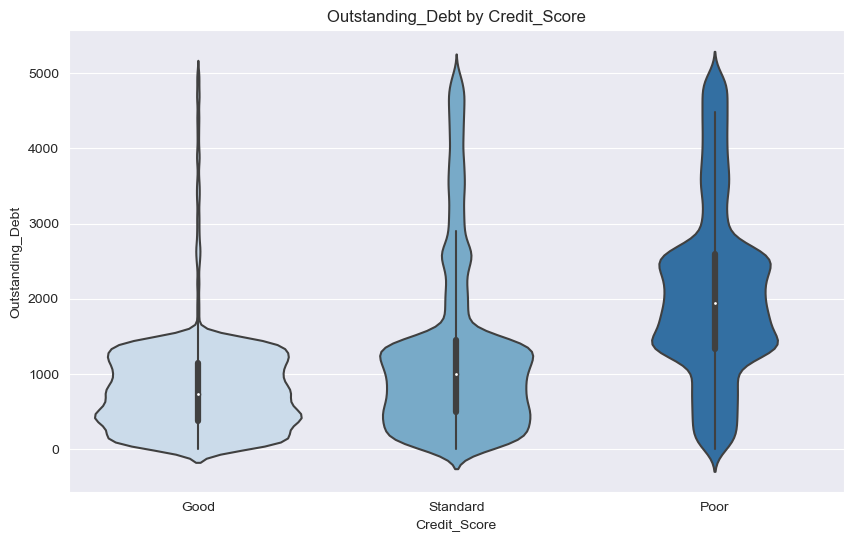

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
# 차이나는 것을 확인한 변수만 선택
numerical_columns = ['Changed_Credit_Limit', 'Credit_History_Age', 'Interest_Rate', 'Num_Credit_Inquiries', 'Outstanding_Debt']

# 타겟 변수 지정
target = 'Credit_Score'

# 바이올린 플롯 그리기 (푸른 계열로 설정)
for col in numerical_columns:
    if col != target:  # 타겟 변수를 제외
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=df, x=target, y=col, palette="Blues")  
        plt.title(f'{col} by {target}')
        
        # 파일 경로 설정 및 저장
        save_path = os.path.join('./static/', f'{col}_by_{target}.png')
        plt.savefig(save_path) 
        plt.show()
